<a href="https://colab.research.google.com/github/SidorenkArtem/Health_Insurance_Dataset/blob/master/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (2).csv


In [2]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "insurance.csv" with length 55628 bytes


In [3]:
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("insurance.csv")

In [0]:
data = data.fillna(data.mean())
data_new = data.copy()
le = LabelEncoder()
data_new['sex'] = le.fit_transform(data_new['sex'])
data_new['smoker'] = le.fit_transform(data_new['smoker'])
df_dummles = pd.get_dummies(data_new, columns=['region'])
data_new = np.array(df_dummles)

Преобразуем категориальные данные для упрощенной работы с ними. 

In [0]:
def visualization_result(y_test, y_pred):
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
  print(df)

  df1 = df.head(25)
  df1.plot(kind='bar',figsize=(16,10))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.show()

In [0]:
def visualization_error(y_test, y_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Сначала я иcпользую входной массив x со всеми полями.
Произвожу разделение данных: train = 80%, test = 20%.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


          Actual     Predicted
0     1646.42970   1934.963686
1    11353.22760  12947.105685
2     8798.59300   9293.266153
3    10381.47870  11275.187391
4     2103.08000   2277.735210
..           ...           ...
263  40103.89000  41208.706366
264  42983.45850  48237.780166
265  44202.65360  45126.891097
266   2136.88225   2126.032496
267   5227.98875   5870.869837

[268 rows x 2 columns]


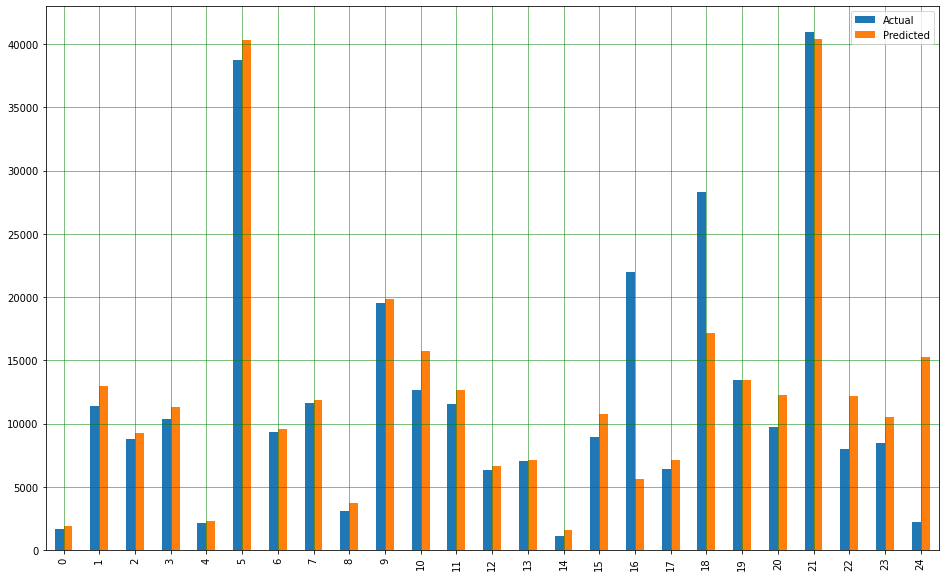

Mean Absolute Error: 2579.834284412089
Root Mean Squared Error: 4650.815566877184


In [8]:
x = data_new[:,[0,1,2,3,4,6,7,8,9]]
y = data_new[:,[5]]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 1)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Улучшение 1.** 

Попробую стандартизировать поля 'bmi', 'age', 'charges', чтобы уменьшить влияние выбросов.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


          Actual     Predicted
0     1646.42970   1619.754392
1    11353.22760  12650.573762
2     8798.59300   9305.655401
3    10381.47870  11140.823861
4     2103.08000   2121.824487
..           ...           ...
263  40103.89000  41529.483869
264  42983.45850  47527.722950
265  44202.65360  45026.331573
266   2136.88225   2065.551414
267   5227.98875   5850.761686

[268 rows x 2 columns]


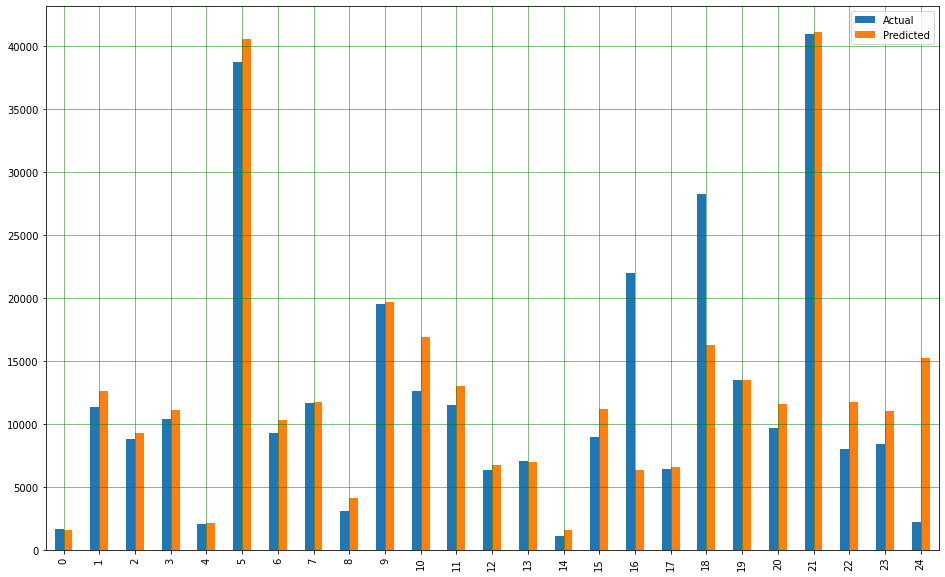

Mean Absolute Error: 2600.6093691687092
Root Mean Squared Error: 4697.273125814258


In [9]:
x = data_new[:,[0,1,2,3,4,6,7,8,9]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Улучшение 2**

Теперь попробую использовать в X те метки, которые оказались более важными.
В представленном ниже примере использую метки, выделенные классификатор ExtraTreesClassifier и Boruto. Это 'age', 'bmi', 'smoker', 'children'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


          Actual     Predicted
0     1646.42970   1887.350759
1    11353.22760  12386.575900
2     8798.59300   9359.617481
3    10381.47870  11741.090241
4     2103.08000   2406.102446
..           ...           ...
263  40103.89000  42201.300973
264  42983.45850  47321.670330
265  44202.65360  46004.724015
266   2136.88225   2006.267300
267   5227.98875   4852.840941

[268 rows x 2 columns]


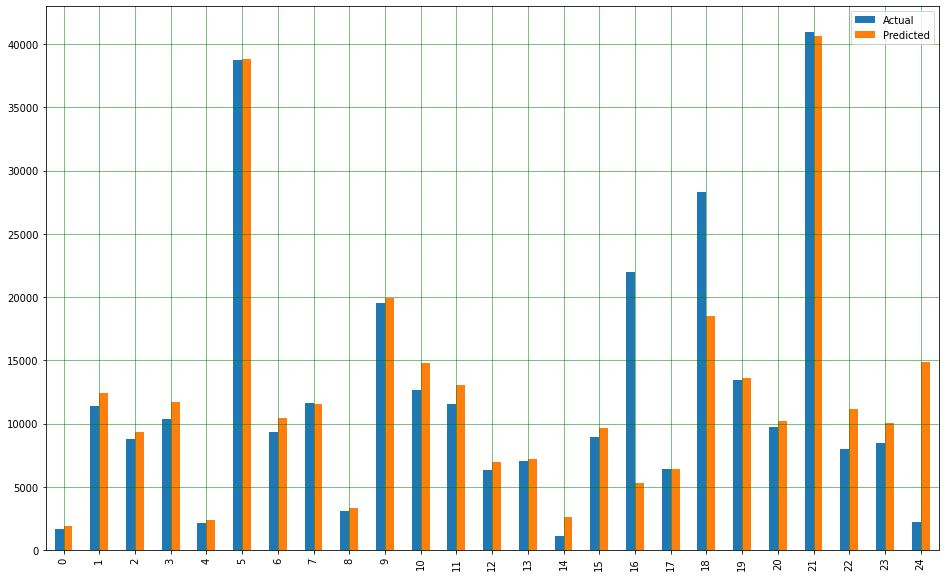

Mean Absolute Error: 2741.588556492536
Root Mean Squared Error: 4735.645539588703


In [10]:
x = data_new[:,[0,2,3,4]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

Из корреляционной матрицы можно выделить 'age', 'bmi', 'smoker'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


          Actual     Predicted
0     1646.42970   1660.265262
1    11353.22760  11985.080456
2     8798.59300  10452.904184
3    10381.47870  11944.927943
4     2103.08000   2628.765893
..           ...           ...
263  40103.89000  44552.797314
264  42983.45850  46332.078704
265  44202.65360  45178.066899
266   2136.88225   1887.175490
267   5227.98875   4991.181722

[268 rows x 2 columns]


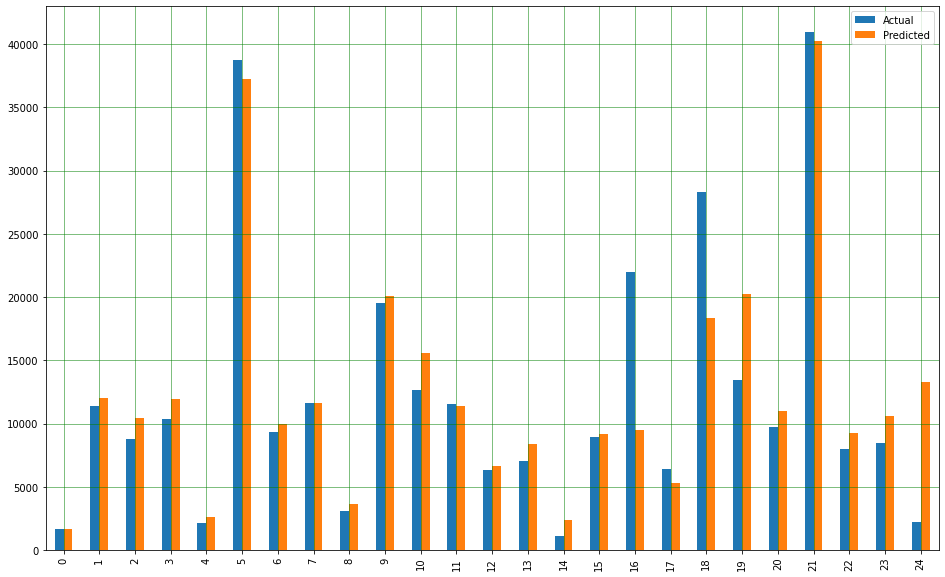

Mean Absolute Error: 3115.8685032642
Root Mean Squared Error: 5252.948009706593


In [11]:
x = data_new[:,[0,2,4]]
y = data_new[:,[5]]

scaler = StandardScaler()
scaler1 = StandardScaler()
y_train_transform = scaler.fit_transform(y)
x[:, [0]] = scaler1.fit_transform(x[:, [0]])
x[:, [1]] = scaler1.fit_transform(x[:, [1]])

X_train, X_test, y_train, y_test = train_test_split(x,y_train_transform, test_size = 0.2,random_state = 1)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

visualization_result(y_test, y_pred)
visualization_error(y_test, y_pred)

**Вывод**

Для этой модели, исходя из полученных результатов, 4 поля( 'age', 'bmi', 'children', 'smoker') описывают данные с той же информативностью, что и все поля вместе. Для 3 полей можно уже заметить потерю информации.